In [1]:
import numpy as np
import pandas as pd 
from numpy import genfromtxt
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from scipy import linalg
import matplotlib.patches as mpatches
import cv2

In [2]:
# (1.1/1.2) Import 'iris.csv' in different ways 
iris_arrayGenFromTxt = genfromtxt('data//iris.csv', delimiter=',')
iris_df = pd.read_csv('data//iris.csv')
iris_arrayDF = iris_df.iloc[:,0:4].values

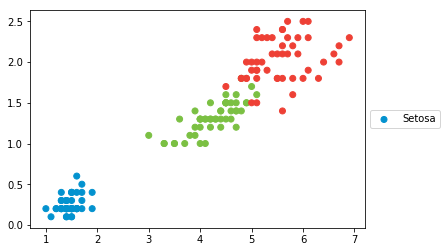

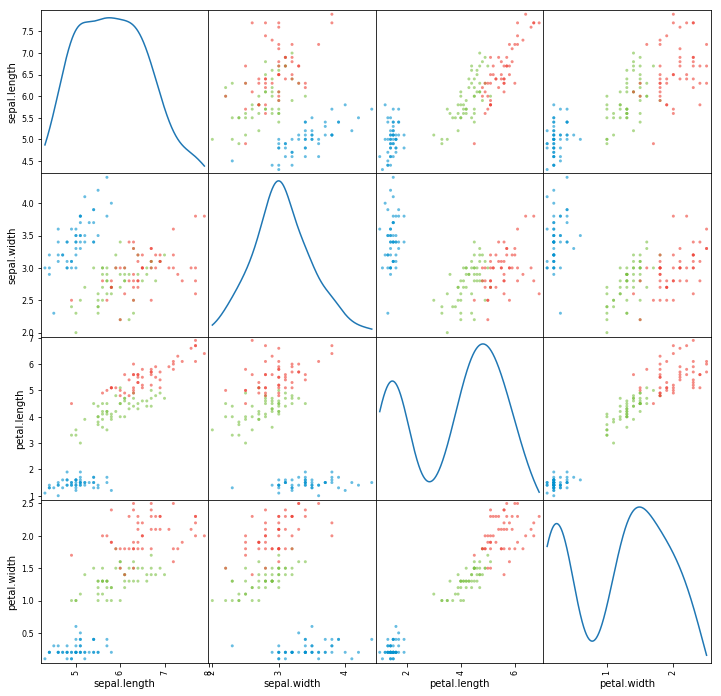

In [3]:
#Create a color vector to separate the different species 
color_wheel = {'Setosa': "#0392cf", 
               'Versicolor': "#7bc043", 
               'Virginica': "#ee4035"}
color_vec = []
for j in range(len(iris_df.variety)):
     color_vec.append( color_wheel[iris_df.variety[j] ] )
#(2) Plot petal length vs petal width
plt.figure()
plt.scatter(iris_df['petal.length'],iris_df['petal.width'],c = color_vec)
plt.legend((color_wheel.keys()) ,loc='center left', bbox_to_anchor=(1, 0.5))

# Plot all different parameter combinations 
scatter_matrix(iris_df, color=color_vec, alpha=0.6, figsize=(12, 12),  diagonal='kde')
plt.show()

In [4]:
U, S, V = linalg.svd( iris_arrayDF.transpose(), full_matrices=False)

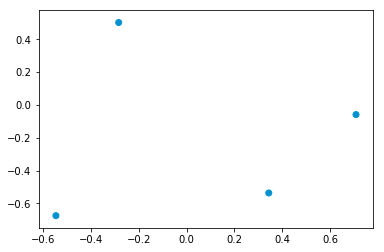

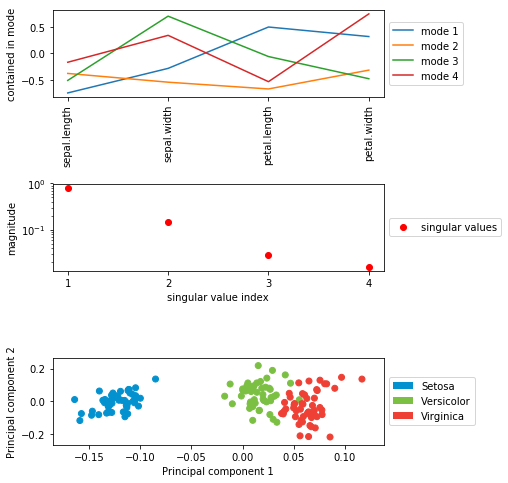

In [5]:
plt.figure()
plt.scatter(U[:,1],U[:,2],c = color_vec)
    
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(311)
ax1.plot(U.transpose())  
plt.xticks(np.arange(0,4), iris_df.columns, rotation='vertical')
plt.ylabel('contained in mode')
ax1.legend(('mode 1','mode 2','mode 3','mode 4'),  loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = plt.subplot(312)
ax2.semilogy(S/np.sum(S), 'ro',label ='sub2_dots')
plt.xlabel('singular value index')
plt.ylabel('magnitude')
plt.xticks(np.arange(0,4), np.arange(1,5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(['singular values'],loc='center left', bbox_to_anchor=(1, 0.5))

ax3 = plt.subplot(313)
plt.scatter(V[1,:],V[2,:],c = color_vec)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

circs= []
for i in color_wheel.keys():  
    circs.append(mpatches.Circle(0,0.1,fc=color_wheel[i]))
plt.legend(circs,color_wheel.keys(),loc='center left', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(hspace=1,right = 0.7)
plt.show()